<h2 style="text-align: center">
رگرسیون خطی
</h2>

<p dir="rtl" style="text-align: center; padding: 20px">
هدف:
مدلی بسازیم که رابطه بین تعداد فالوئرها (follower count) و تعداد لایک‌ها (likes) رو پیش‌بینی کنه.
</p>

In [159]:
# =====================
# import libraries
# =====================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<p dir="rtl" style="text-align: center">
دیتاست از سایت کگل دانلود شده: و در دایرکتوری فعلی قرار گرفته
<a href="https://www.kaggle.com/datasets/amirmotefaker/instagram-data">لینک</a>
</p>

In [160]:
# =====================
# load dataset
# =====================

df = pd.read_csv("Instagram data.csv", encoding='latin1')

In [161]:
# =====================
# print info
# =====================

print('first rows')
print(df.head())

print('shape')
print(df.shape)

print('columns')
df.dtypes

first rows
   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a mac

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

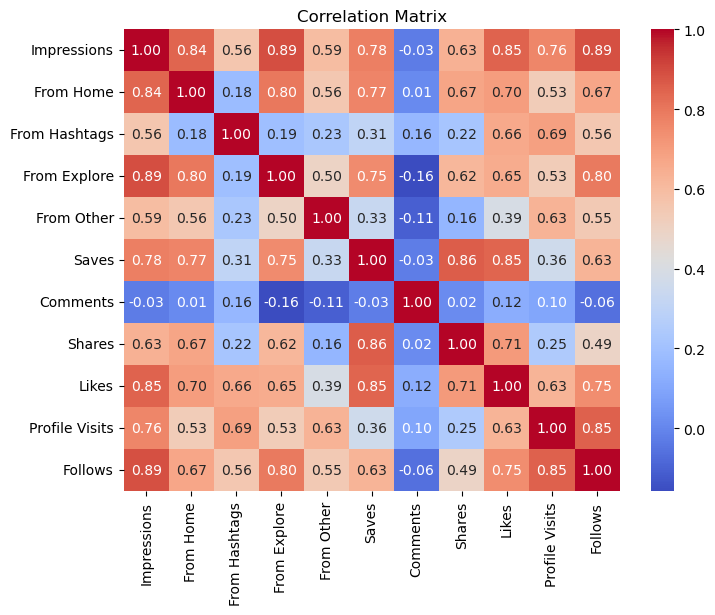

In [162]:
# =====================
# visualization
# =====================

#correlation matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


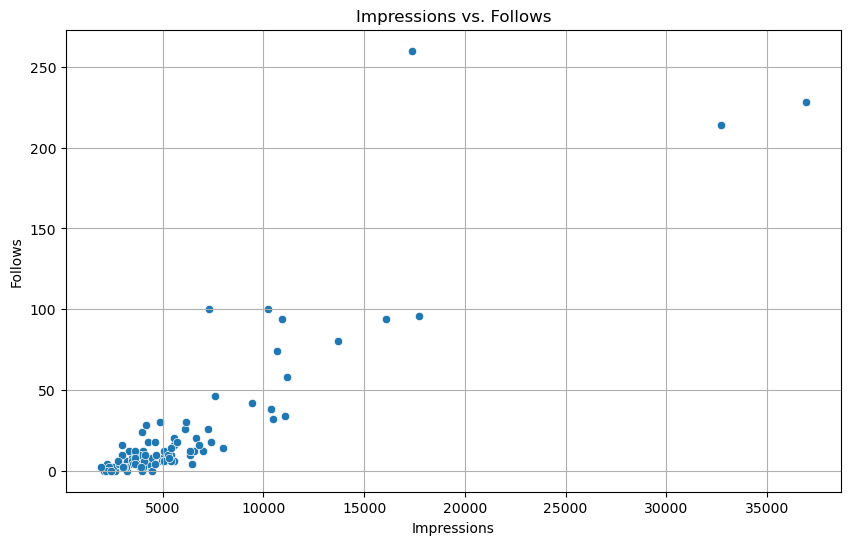

In [163]:
# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Follows')
plt.title('Impressions vs. Follows')
plt.xlabel('Impressions')
plt.ylabel('Follows')
plt.grid(True)
plt.show()

<p dir="rtl" style="text-align: center; padding: 50px">
طبق بصری سازی و مشاهده ماتریس همبستگی و اسکتر پلات، به نظر میرسد ارتباط خوبی بین ستون های Follows و Imperssions وجود دارد. که انتخاب خوبی برای رگرسیون خطی هستند
</p>

In [164]:
# =====================
# preprocessing
# =====================

# Keep only relevant columns
df = df[['Impressions', 'Follows']]
print(df.head())

# Check for NaN values in both columns
print("Number of NaN values:")
print(df.isna().sum())

   Impressions  Follows
0         3920        2
1         5394       10
2         4021       12
3         4528        8
4         2518        0
Number of NaN values:
Impressions    0
Follows        0
dtype: int64


In [165]:
# =====================
# Train-Test Split
# =====================

# Define features (X) and target variable (y)
X = df[['Impressions']]
y = df['Follows']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 95 samples
Test set size: 24 samples


In [166]:
# =====================
# Train Linear Regression Model
# =====================

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the coefficients (slope) and intercept
print(f"Coefficient (Slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Coefficient (Slope): 0.008
Intercept: -22.743


In [167]:
# =====================
# Model Evaluation
# =====================

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Squared Error (MSE): 110.322
Root Mean Squared Error (RMSE): 10.503
R-squared (R²): 0.946


<p dir="rtl" style="text-align: center; padding: 50px">
طبق پیش بینی مدل به نظر میرسد به طور میانگین مدل ما تعداد ۱۰ فالو به ازای Imperssion جدید اشتباه پیش بینی میکند. یعنی ۱۰ فالو خطا دارد. همچنین با توجه به R2 بدست آمده مشخص است مدل میتواند 94 درصد تغییرات را توضیح دهد که عددخوبی است
</p>